# Exploratory Data Analysis – Airbnb Listings

This notebook explores the cleaned Airbnb listings dataset to identify 
patterns related to availability, room types, neighborhoods, and host behavior.

The analysis focuses on generating business-relevant insights for Airbnb hosts 
operating in a regulated German market.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [14]:
df = pd.read_csv("../data/processed/airbnb_listings_cleaned.csv")

In [15]:
df.shape

(17730, 16)

In [16]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,Sydney,-33.86767,151.22497,Private room,90,193,2020-03-13,1.01,1,364,0,NaN
1,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,Sydney,-33.87964,151.21680,Private room,1,632,2025-09-01,3.83,1,295,51,PID-STRA-24061-7
2,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,Sydney,-33.87888,151.21439,Entire home/apt,2,85,2025-08-31,0.47,1,0,10,PID-STRA-74219
3,58506,"Studio Yindi @ Mosman, Sydney",279955,John,Mosman,-33.81748,151.23484,Entire home/apt,2,448,2025-08-31,2.50,1,138,29,PID-STRA-2810
4,68999,A little bit of Sydney - Australia,333581,Bryan,Hornsby,-33.72966,151.05226,Private room,1,120,2025-06-08,0.69,1,265,12,PID-STRA-9081


## Dataset Overview

This section provides a high-level overview of the Airbnb listings market,
including listing count, room types, and host participation.


In [17]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,17730.0,NaN,NaN,NaN,767383960172668928.0,562521464412718592.0,11156.0,43835347.5,951595611489483264.0,1273615403635385856.0,1480493397212908800.0
name,17730,17269,Modern Elegance of Mascot Living,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,17730.0,NaN,NaN,NaN,211898350.693739,209422262.907644,35582.0,28262450.75,132288219.0,369908172.0,711457600.0
host_name,17728,3853,Ken,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,17730,38,Sydney,4190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,17730.0,NaN,NaN,NaN,-33.851333,0.089294,-34.09568,-33.896215,-33.875129,-33.80362,-33.38364
longitude,17730.0,NaN,NaN,NaN,151.175164,0.116042,150.63049,151.135117,151.205292,151.252835,151.34014
room_type,17730,4,Entire home/apt,14089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,17730.0,NaN,NaN,NaN,18.269825,37.746521,1.0,2.0,2.0,7.0,999.0
number_of_reviews,17730.0,NaN,NaN,NaN,39.13683,72.415637,0.0,2.0,12.0,44.0,1253.0


## Listings Distribution by Neighborhood

Understanding where listings are concentrated helps hosts assess 
local competition and market saturation.


In [18]:
neighborhood_counts = (
    df["neighbourhood"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "neighbourhood", "neighbourhood": "listing_count"})
)

neighborhood_counts.head(10)


,listing_count,count
0,Sydney,4190
1,Waverley,1614
2,Randwick,965
3,Pittwater,903
4,Warringah,825
5,Manly,823
6,North Sydney,708
7,Woollahra,548
8,Marrickville,488
9,Sutherland Shire,486


In [21]:
neighborhood_counts.columns


Index(['listing_count', 'count'], dtype='object')

In [22]:
neighborhood_counts = (
    df["neighbourhood"]
    .value_counts()
    .reset_index()
)

neighborhood_counts.columns = ["neighbourhood", "listing_count"]


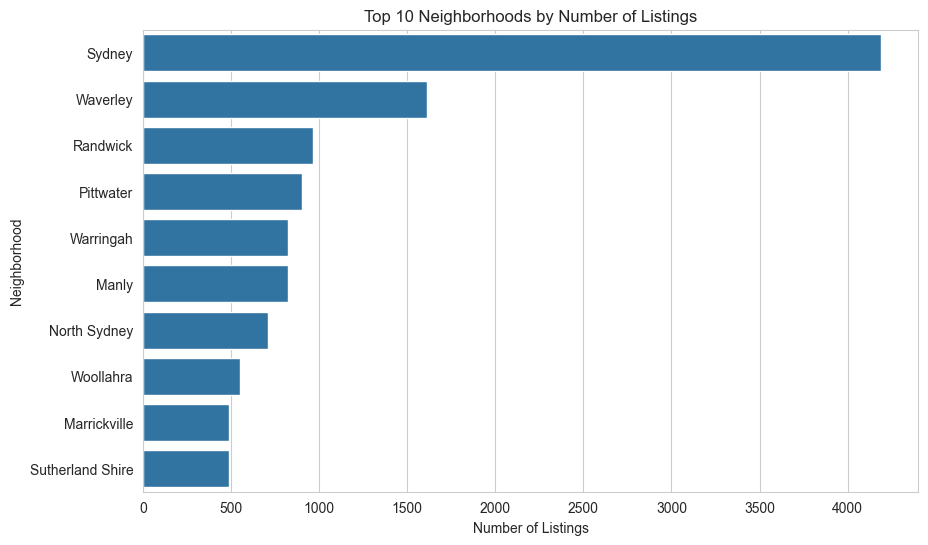

In [23]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=neighborhood_counts.head(10),
    x="listing_count",
    y="neighbourhood"
)

plt.title("Top 10 Neighborhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()


### Interpretation

- A small number of neighborhoods account for a large share of listings
- This suggests uneven competition across the city
- Hosts in high-density areas may face stronger competition


## Room Type Distribution

This section analyzes the prevalence of different room types in the market.


In [25]:
df["room_type"].value_counts(normalize=True) * 100


room_type
Entire home/apt    79.464185
Private room       19.932318
Hotel room          0.394811
Shared room         0.208686
Name: proportion, dtype: float64

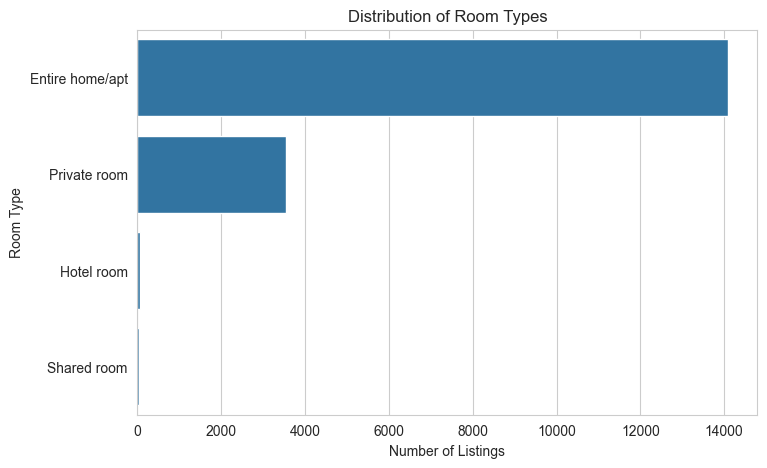

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    y="room_type",
    order=df["room_type"].value_counts().index
)
plt.title("Distribution of Room Types")
plt.xlabel("Number of Listings")
plt.ylabel("Room Type")
plt.show()


### Interpretation

- Entire homes/apartments dominate the market
- Private rooms still represent a significant share
- This reflects typical urban Airbnb supply in German cities


## Availability Analysis

Availability (days per year) provides insight into how actively listings 
are offered on the platform.


In [27]:
df["availability_365"].describe()


count    17730.000000
mean       171.959447
std        122.857864
min          0.000000
25%         64.000000
50%        163.000000
75%        280.000000
max        365.000000
Name: availability_365, dtype: float64

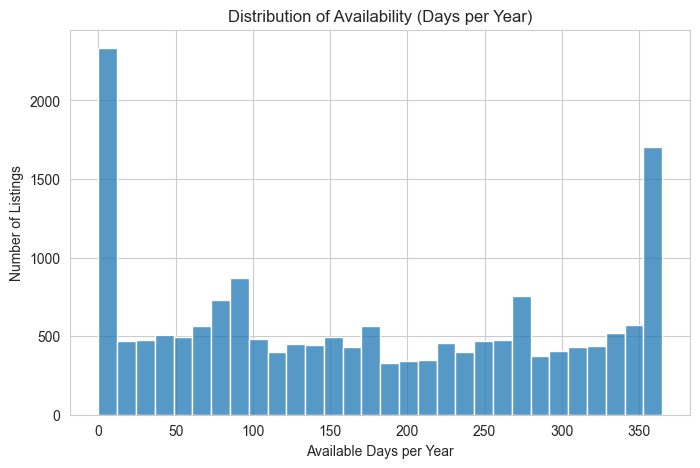

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df["availability_365"], bins=30)
plt.title("Distribution of Availability (Days per Year)")
plt.xlabel("Available Days per Year")
plt.ylabel("Number of Listings")
plt.show()


### Interpretation

- Many listings are available for only part of the year
- This may reflect regulatory limits or host preferences
- A smaller group of listings appears available year-round


## Host Activity Analysis

This section explores how many listings hosts manage and how this relates 
to market structure.


In [29]:
df["calculated_host_listings_count"].describe()


count    17730.000000
mean        18.395939
std         35.618001
min          1.000000
25%          1.000000
50%          2.000000
75%         18.000000
max        183.000000
Name: calculated_host_listings_count, dtype: float64

In [30]:
df["calculated_host_listings_count"].value_counts().head(10)


calculated_host_listings_count
1     7128
2     1770
3      954
4      488
5      385
6      384
41     328
9      315
7      280
8      240
Name: count, dtype: int64